In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from analysis import utils, io, stats, signal, cifti

In [4]:
#from visualization import 
import numpy as np
from visualization.scifig import Figure
from matplotlib.pyplot import cm

def plot_brain(idx, mask, cmap, indices, clabel=None, vrange=None,
               border=None, labelpad=-5, hemil=False, title='', prec='{:.2f}', cbar_range=None):
    if vrange is None:
        if cbar_range is None:
            vrange = [mask.min(), mask.max()]
        else:
            vrange = [-np.abs(mask).max(), np.abs(mask).max()]

    brain_mask = np.zeros(360)
    brain_mask[indices] = mask
    #brain_mask = np.hstack((np.zeros(19), brain_mask))

    #self.fig[idx].set_brain(cifti_extension='dlabel', cifti_template='glasser', mayavi=False, dpi=300)
    #self.fig[idx].brain.plot(data=brain_mask, cmap=cmap, scene='left', vrange=vrange)
    # print(fig.fig[0].brain.vrange)
    #self.fig[idx].brain_cbar(cbar_loc='bottom', append=True, cbar_title=clabel)
    #brain_plot = Brain(ax, surface='inflated', parc='cole')
    fig[idx].set_brain(surface='veryinflated', parc='cole', mayavi=True, dpi=300)
    fig[idx].brain.plot(brain_mask, cmap=cmap, style='left',
                        hemi_label=hemil, borders=border, title=title, vrange=vrange)
    fig[idx].brain_cbar(cbar_loc='bottom', append=True, cbar_title=None)
    if clabel is not None:
        fig[idx].cb.set_label(clabel, size=6, labelpad=labelpad)

    fig[idx].cb.ax.set_xticklabels([prec.format(vrange[0]), prec.format(vrange[1])], fontsize=6)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


AttributeError: 'Cifti' object has no attribute 'extensions'

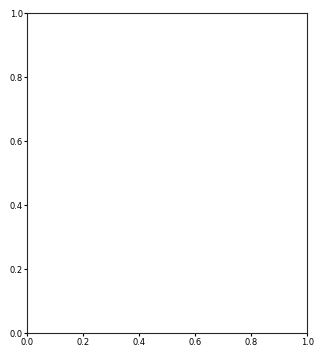

In [8]:
params = {'legend.fontsize': 6.0, 'font.size': 6.0, 'axes.labelsize': 6.0,
          'axes.titlesize': 6.0, 'xtick.labelsize': 6.0, 'ytick.labelsize': 6.0}

fig = Figure(size=(7.0, 4.0), params=params, latex=False)
fig.add_plot([0.05, 0.1, 0.4, 0.8])

#data = io.Data(input_path='/Users/murat/Dropbox/My\Mac\(Murat\’s\MacBook\Air)/Documents/datatools/data/hcp/neuron_2019')
#fin = data.load('hcp_334_cortex_average_structural.hdf5')
#indices = fin['indices_L'][()]
#fin.close()

mask = np.arange(180)
indices = np.arange(180)
vrange = [mask.mean() - 2. * mask.std(), mask.mean() + 2. * mask.std()]
plot_brain(0, mask, 'RdBu_r', indices, title='Ignition', cbar_range=None, vrange=vrange)